# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [64]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[0:10])
print(countries[0:10])
print(type(cities))
print(type(cities[0]))
#used to verify if OpenWeatherMap formatting was working in next cell
#test_city='Minneapolis'


597
['atar', 'rikitea', 'lompoc', 'dunmore town', 'chokurdakh', 'ushuaia', 'floro', 'victoria', 'touros', 'tuktoyaktuk']
['mr', 'pf', 'us', 'bs', 'ru', 'ar', 'no', 'sc', 'br', 'ca']
<class 'list'>
<class 'str'>


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [65]:
#Create settings dictionary with information we're interested in for the OpenWeather App
#loading as imperial units (F, mph, etc)
settings = {"units": "imperial", "appid": api_key, "country code": ""}

#create empty lists to store the JSON data
latitude=[]
longitude=[]
temp=[]
RH=[]
cloudiness=[]
windSpeed=[]
lost_cities=[]
city_list=[]
country_list=[]

#counter to help index country code list
counter=0

for city in cities:

    try:
        
        #free service limits 60 calls per minute
        #call country code and city name to feed into request for JSON data
        country=countries[counter]
        settings["country code"]=country
        
        city_weatherObject = owm.get_current(city, **settings)

        #------store desired information on the city
        #------verified it pulls accurate data
        #Latitude
        city_list.append(city)
        country_list.append(country)
        latitude.append(city_weatherObject['coord']['lat'])
        #Longitude
        longitude.append(city_weatherObject['coord']['lon'])
        #Temperature
        temp.append(city_weatherObject['main']['temp'])
        #Relative Humidity (%)
        RH.append(city_weatherObject['main']['humidity'])
        #Cloudiness (%)
        cloudiness.append(city_weatherObject['clouds']['all'])
        #Wind speed (mph)
        windSpeed.append(city_weatherObject['wind']['speed'])
        
        #display message to demonstrate it is pulling city information
        print(f"Retriving information on {city} - process call number {counter}")
        
        #iterate the counter for country code
        counter=counter+1
        
        #delay request to ensure it doesn't go over 60 calls per minute
        time.sleep(1)
        
    except:
        print(f"Could not find {city}")
        lost_cities.append(city)
        
print("------------------------")
print("Data retrival complete")
print("------------------------")

Could not find kiparissia
Could not find tugalan
Could not find taolanaro
Could not find illoqqortoormiut
Could not find amderma
Could not find attawapiskat
Could not find urdzhar
Could not find vaitupu
Could not find tumannyy
Could not find kalomo
Could not find asau
Could not find belushya guba
Could not find marang
Could not find samusu
Could not find sumbawa
Could not find mys shmidta
Could not find barentsburg
Could not find phrai bung
Could not find higuey
Could not find phan rang
Could not find addi ugri
Could not find umzimvubu
Could not find sentyabrskiy
Could not find ust-kamchatsk
Could not find skalistyy
Could not find a
Could not find lolua
Could not find grimari
Could not find bengkulu
Could not find pemangkat
Could not find santa eulalia del rio
Could not find palabuhanratu
Could not find tukrah
Could not find cam pha
Could not find tabiauea
Could not find urumqi
Could not find dianopolis
Could not find tsihombe
Could not find marcona
Could not find turtkul
Could not fin

In [66]:
#check I have list with data
#print(city_list)
#print(windSpeed)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [68]:
#create a dataframe to hold the collected information
city_weather=pd.DataFrame(columns=["Country", 'City', 'Latitude', 'Longitude', 'Temperature (F)',
                                  'Relative Humidity (%)', "Cloudiness (%)", "Wind Speed (mph)"])

print(len(city_list))
print(len(latitude))
print(len(lats))
print(len(lost_cities))

city_weather["City"]=city_list
city_weather["Country"]=country_list
city_weather["Latitude"]=latitude
city_weather["Longitude"]=longitude
city_weather["Temperature (F)"]=temp
city_weather["Relative Humidity (%)"]=RH
city_weather["Cloudiness (%)"]=cloudiness
city_weather["Wind Speed (mph)"]=windSpeed

city_weather.head()

528
528
1500
69


,Country,City,Latitude,Longitude,Temperature (F),Relative Humidity (%),Cloudiness (%),Wind Speed (mph)
0,mr,atar,20.52,-13.05,93.23,10,0,5.10
1,pf,rikitea,-23.12,-134.97,71.45,80,100,22.73
2,us,lompoc,34.64,-120.46,71.55,32,20,10.29
3,bs,dunmore town,25.50,-76.65,80.99,79,41,17.41
4,ru,chokurdakh,70.62,147.90,20.27,84,98,12.44


In [72]:
#save the dataframe into a csv file
city_weather.to_csv("output_city_weather_20191005.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

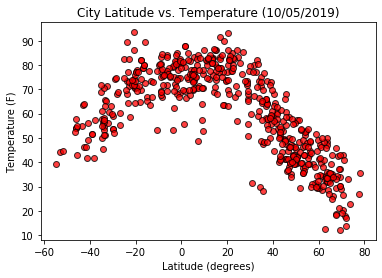

In [73]:
#create latitude vs. temperature plot
x_axis=city_weather["Latitude"]
y_axis=city_weather["Temperature (F)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Temperature (10/05/2019)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude (degrees)")
plt.savefig("latitude_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

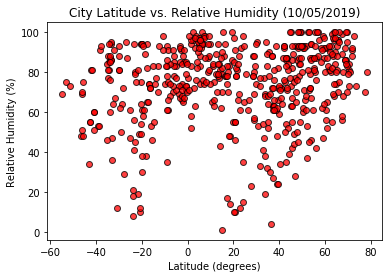

In [75]:
#create latitude vs. relative humidity plot
x_axis=city_weather["Latitude"]
y_axis=city_weather["Relative Humidity (%)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Relative Humidity (10/05/2019)")
plt.ylabel("Relative Humidity (%)")
plt.xlabel("Latitude (degrees)")
plt.savefig("latitude_RH.png")
plt.show()

#### Latitude vs. Cloudiness Plot

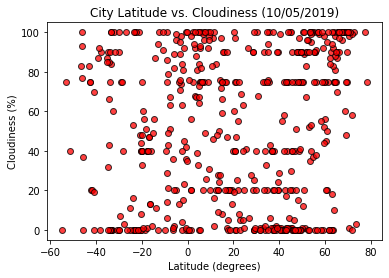

In [76]:
#create latitude vs. cloudiness plot
x_axis=city_weather["Latitude"]
y_axis=city_weather["Cloudiness (%)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (10/05/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (degrees)")
plt.savefig("latitude_clouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

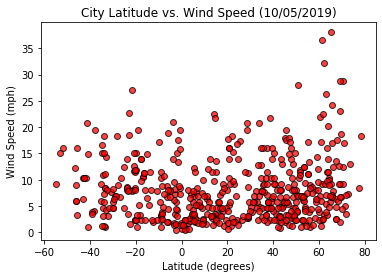

In [78]:
#create latitude vs. wind speed plot
x_axis=city_weather["Latitude"]
y_axis=city_weather["Wind Speed (mph)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (10/05/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (degrees)")
plt.savefig("latitude_windspeed.png")
plt.show()